# Unemployment in India Analysis

 Dataset : 
- This dataset contains the unemployment rate of all the states in India

    - Region = states in India
    - Date = date which the unemployment rate observed
    - Frequency = measuring frequency (Monthly)
    - Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
    - Estimated Employed = percentage of people employed
    - Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

Objectives :
- The main objective of this exploratory data analysis is to understand unemployment trends across Indian states, with a special focus on the  Covid-19 period. Through this analysis, we aim to:
    - Examine overall unemployment patterns in India over time.
    - Identify the impact of Covid-19 on employment opportunities and labour participation.
    - Explore regional variations in unemployment across different states.
    - Detect seasonal or cyclical trends in the unemployment rate.
    - Visualize insights interactively using Python libraries for clear communication.
    - Provide data-driven recommendations that may inform economic or social policies.

## 1. Import libraries and Load dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r'C:\Users\USER\Desktop\git hub\Unemployment Analysis\Unemployment in India.csv')
df2 = pd.read_csv(r'C:\Users\USER\Desktop\git hub\Unemployment Analysis\Unemployment_Rate_upto_11_2020.csv')

## 2. Unemployment in India (df1)

### 2.1 Inspect the df1 

In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df1.shape

(768, 7)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df1.describe(include=object)

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [8]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
df1.duplicated().sum()

27

In [10]:
df1.nunique()

Region                                       28
 Date                                        14
 Frequency                                    2
 Estimated Unemployment Rate (%)            624
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    626
Area                                          2
dtype: int64

### 2.2 Missing value treatment

In [11]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
# check that missing rows are fully blank 
# False means at least one feature in dataset have value
df1.isna().all(axis=None)

False

In [13]:
# % of missing value
round(df1.isnull().sum() / df1.shape[0] * 100.00, 2)

Region                                      3.65
 Date                                       3.65
 Frequency                                  3.65
 Estimated Unemployment Rate (%)            3.65
 Estimated Employed                         3.65
 Estimated Labour Participation Rate (%)    3.65
Area                                        3.65
dtype: float64

In [14]:
# Filling missing value of numerical columns
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

In [15]:
cat_cols = df1.select_dtypes(include = ['object']).columns

for col in cat_cols:
    df1[col].fillna(df1[col].mode()[0], inplace= True)

In [16]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### 2.3 Data Cleaning

In [17]:
df1.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [18]:
columns = df1.columns
for col in columns:
    print(col,"\n" ,df1[col].unique(),"\n")

Region 
 ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh'] 

 Date 
 [' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020'] 

 Frequency 
 [' Monthly' 'Monthly'] 

 Estimated Unemployment Rate (%) 
 [ 3.65  3.05  3.75  3.32  5.17  3.52  4.12  4.38  4.84  5.91  4.06 16.29
 14.46  0.85  4.29  5.08  4.26  5.79  4.46  4.65  4.66  3.26  3.77  9.38
  0.    9.27 10.2  13.44 11.    8.87 12.47 12.4  10.16  9.13  9.61 15.39
 45.09 47.26 20.49  9.82  6.76  4.54  4.64  8.33  6.96  2.77  6.11  9.89
  7.89  7.31  7.64 10.14 12.56  9.33 11.07 17.18 12.5  15.84 11.11 16

In [19]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [20]:
# remove space from columns name
df1.columns = df1.columns.str.strip()

In [21]:
# remove space at start & end of string to make 1 unique
df1['Frequency'] = df1['Frequency'].str.strip()

In [22]:
# convert date dtype to datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

In [23]:
# converting dtype to categorical 
df1['Region'] = df1['Region'].astype('category')
df1['Frequency'] = df1['Frequency'].astype('category')
df1['Area'] = df1['Area'].astype('category')


In [24]:
# convert to int 
df1['Estimated Employed'] = df1['Estimated Employed'].astype('int')

In [25]:
df1.shape

(768, 7)

In [26]:
df1.duplicated().sum()

27

In [27]:
df1.drop_duplicates(inplace=True)

In [28]:
df1.shape

(741, 7)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   741 non-null    category      
 1   Date                                     741 non-null    datetime64[ns]
 2   Frequency                                741 non-null    category      
 3   Estimated Unemployment Rate (%)          741 non-null    float64       
 4   Estimated Employed                       741 non-null    int32         
 5   Estimated Labour Participation Rate (%)  741 non-null    float64       
 6   Area                                     741 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1)
memory usage: 29.7 KB


In [30]:
df1.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,741,741.000000,7.410000e+02,741.000000
mean,2019-12-12 18:12:08.744939264,11.783306,7.201140e+06,42.628138
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.660000,1.192616e+06,38.070000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.880000,1.126583e+07,45.490000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.714796,8.083027e+06,8.105792


### 

## 3. Unemployment_Rate_upto_11_2020

### 3.1 Inspect the df2 dataset

In [31]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [32]:
df2.shape

(267, 9)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [34]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [35]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [36]:
df2.nunique()

Region                                       27
 Date                                        10
 Frequency                                    1
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
dtype: int64

In [37]:
df2.duplicated().sum()

0

In [38]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### 3.2 Data Cleaning

In [39]:
df2.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [40]:
columns = df2.columns
for col in columns:
    print(col,"\n" ,df2[col].unique(),"\n")

Region 
 ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'] 

 Date 
 [' 31-01-2020' ' 29-02-2020' ' 31-03-2020' ' 30-04-2020' ' 31-05-2020'
 ' 30-06-2020' ' 31-07-2020' ' 31-08-2020' ' 30-09-2020' ' 31-10-2020'] 

 Frequency 
 [' M'] 

 Estimated Unemployment Rate (%) 
 [ 5.48  5.83  5.79 20.51 17.43  3.31  8.34  6.96  6.4   6.59  4.66  4.41
  4.77 11.06  9.55  0.6   3.77  5.53  1.19  3.02 10.61 10.29 15.43 46.64
 45.96 17.82 12.79 13.44 11.91  9.82  9.65  8.38  7.54  3.41 10.5  14.23
 10.27  5.63  1.96  6.62 22.23 14.84 17.04 16.68 42.27 18.19 20.3  13.79
 12.53  6.27  8.89  2.81  5.25 13.31 21.25  9.96 17.07 16.21 15.38 11.54
  5.54  6.38  6.66 18.71 12.11  3.2   1.84  1.87  3.42  4.03 20.34 25.77
 25.05 43

In [41]:
# remove space from columns name
df2.columns = df2.columns.str.strip()

In [42]:
# Remove whitespace from it
df2['Frequency'] = df2['Frequency'].str.strip()

# convert M to Monthly 
df2['Frequency'] = df2['Frequency'].replace('M', 'Monthly')

In [43]:
# type conversion to categorical
df2['Region'] = df2['Region'].astype('category')
df2['Frequency'] = df2['Frequency'].astype('category')
df2['Region.1'] = df2['Region.1'].astype('category')

In [44]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [45]:
df2.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [46]:
df2.dtypes

Region                                           category
Date                                       datetime64[ns]
Frequency                                        category
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                         category
dtype: object

## 4. Merge Both Datasets (df)

In [47]:
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [48]:
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1'],
      dtype='object')

In [49]:
df = df1.merge(df2[['Region','Region.1']],on=['Region']).drop_duplicates()

In [50]:
df.shape

(729, 8)

In [51]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Region.1'],
      dtype='object')

In [52]:
# Rename region to state & Region.1 to Region
df = df.rename(columns={'Region': 'State'})
df = df.rename(columns={'Region.1' : 'Region'})

In [53]:
columns = df.columns
for col in columns:
    print(col,"\n" ,df[col].unique(),"\n")

State 
 ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'] 

Date 
 <DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns] 

Frequency 
 ['Monthly']
Categories (1, object): ['Monthly'] 

Estimated Unemployment Rate (%) 
 [ 3.65  3.05  3.75  3.32  5.17  3.52  4.12  4.38  4.84  5.91  4.06 16.29
 14.46  0.85  4.29  5.08  4.26  5.79  4.46  4.65  4.66  3.26  3.77  9.38
  0.    9.27 10.2  13.44 11.  

In [54]:
df.dtypes

State                                              object
Date                                       datetime64[ns]
Frequency                                        category
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int32
Estimated Labour Participation Rate (%)           float64
Area                                             category
Region                                           category
dtype: object

In [55]:
df['State'] = df['State'].astype('category')
df['Estimated Employed'] = df['Estimated Employed'].astype('int64')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 7225
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    729 non-null    category      
 1   Date                                     729 non-null    datetime64[ns]
 2   Frequency                                729 non-null    category      
 3   Estimated Unemployment Rate (%)          729 non-null    float64       
 4   Estimated Employed                       729 non-null    int64         
 5   Estimated Labour Participation Rate (%)  729 non-null    float64       
 6   Area                                     729 non-null    category      
 7   Region                                   729 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(1)
memory usage: 33.0 KB


In [57]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,729,729.000000,7.290000e+02,729.000000
mean,2019-12-13 03:13:34.814814976,11.714033,7.314462e+06,42.682318
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.640000,1.454956e+06,38.090000
50%,2019-11-30 00:00:00,8.200000,4.822035e+06,41.200000
75%,2020-03-31 00:00:00,15.690000,1.133570e+07,45.600000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.767734,8.100506e+06,8.151549


In [58]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

State                                      0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Region                                     0
dtype: int64

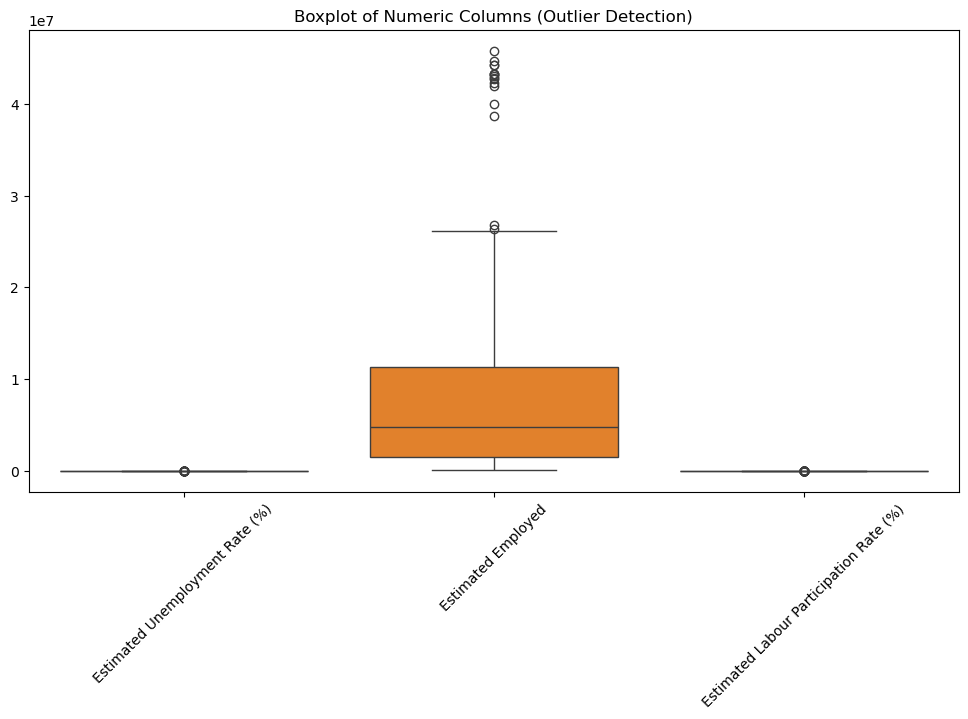

In [60]:
# check outlier in numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numeric Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

- Estimated Empolyed has more outlier

### Feature Engineering

- We created new features to enhance analysis:

    - Date Components – Extracted Month and Year from the Date column for seasonal and yearly trend analysis.
    - Total Working Population – Derived using labour participation rate and employment figures.
    - Estimated Unemployed -  % of people in the labour force who are not employed
    - Estimated Employed Percentage – Share of employed individuals in the working population.
    - Estimated Employment Rate (%) – Employment rate per area.

In [61]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,South
10,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,South
20,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,South
30,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,South
40,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,South


In [62]:
# Extract 'Year' from 'Date' 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [63]:
#  Estimated Employment Rate (%)
df['Estimated Employment Rate (%)'] = 100 - df['Estimated Unemployment Rate (%)']

In [64]:
# Calculate total working population
df['Total Working Population'] = round(
    df['Estimated Employed'] * 100 / (100 - df['Estimated Unemployment Rate (%)'])
)


In [65]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Region', 'Year', 'Month', 'Estimated Employment Rate (%)',
       'Total Working Population'],
      dtype='object')

In [66]:
df.shape

(729, 12)

In [67]:
df.dtypes

State                                            category
Date                                       datetime64[ns]
Frequency                                        category
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                             category
Region                                           category
Year                                                int32
Month                                               int32
Estimated Employment Rate (%)                     float64
Total Working Population                          float64
dtype: object

## 5. Visuallization & Insight

### Univariate Analysis

#### Categorical Columns

- How are values distributed in Categorical Columns?

In [68]:
df.select_dtypes(include=['category']).columns

Index(['State', 'Frequency', 'Area', 'Region'], dtype='object')

In [69]:
df.select_dtypes(include=['float64', 'int64', 'int32']).columns

Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Year', 'Month',
       'Estimated Employment Rate (%)', 'Total Working Population'],
      dtype='object')

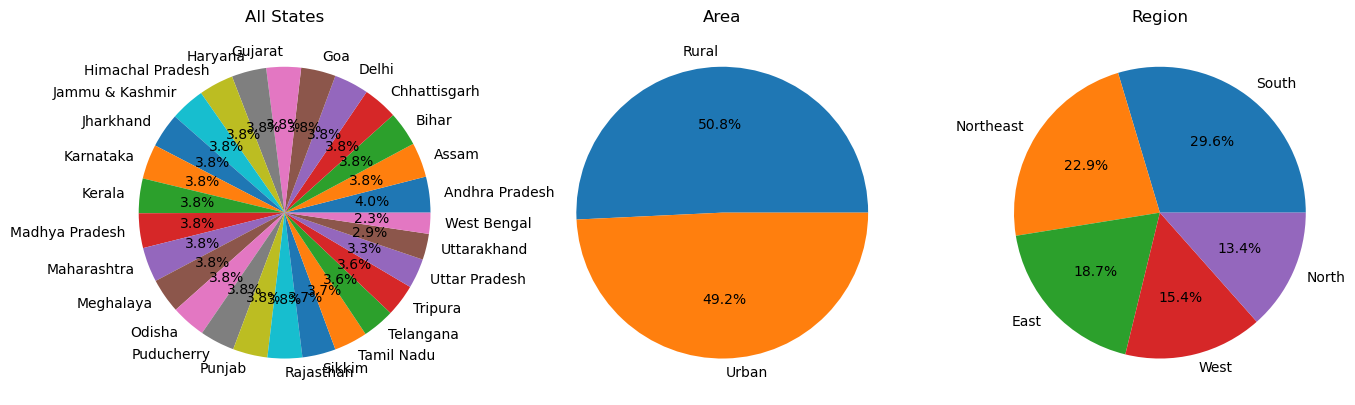

In [70]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,7))

ax[0].pie(df['State'].value_counts(),labels=df['State'].unique(),autopct='%0.1f%%')

ax[1].pie(df['Area'].value_counts(),labels=df['Area'].unique(),autopct='%0.1f%%')
ax[2].pie(df['Region'].value_counts(),labels=df['Region'].unique(),autopct='%0.1f%%')
ax[0].set_title('All States')
ax[1].set_title('Area')
ax[2].set_title('Region')
plt.show()

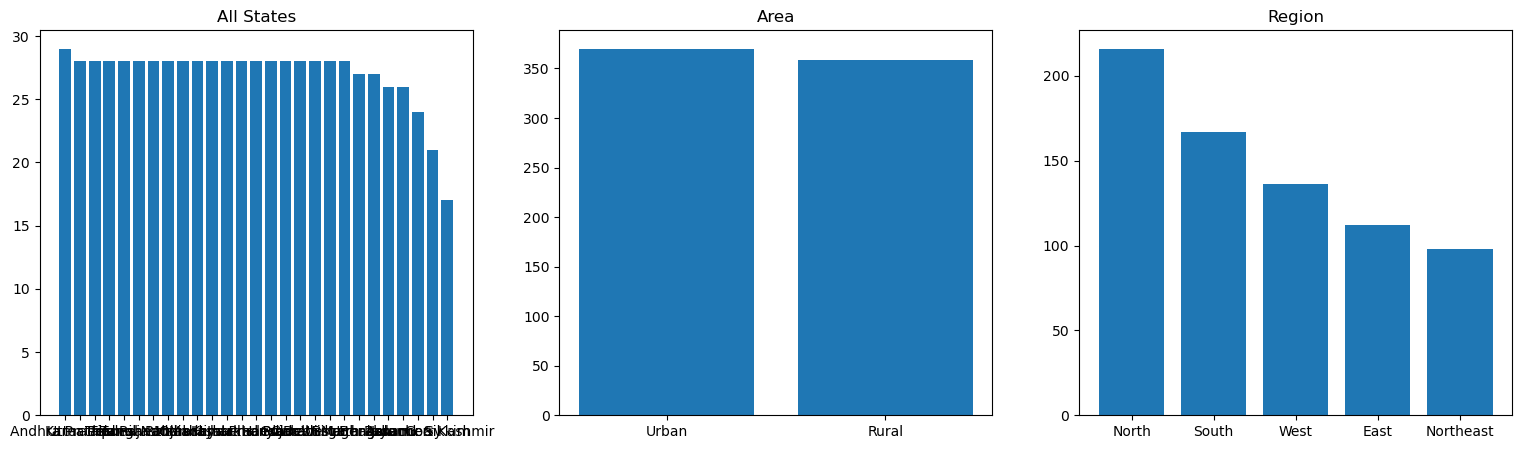

In [71]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(19,5))

ax[0].bar(df['State'].value_counts().reset_index()['State'],df['State'].value_counts().reset_index()['count'])
ax[1].bar(df['Area'].value_counts().reset_index()['Area'],df['Area'].value_counts().reset_index()['count'])
ax[2].bar(df['Region'].value_counts().reset_index()['Region'],df['Region'].value_counts().reset_index()['count'])

ax[0].set_title('All States')
ax[1].set_title('Area')
ax[2].set_title('Region')
plt.show()

#### Numerical Columns

- How are values distributed in Numerical Columns?

In [72]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Region', 'Year', 'Month', 'Estimated Employment Rate (%)',
       'Total Working Population'],
      dtype='object')

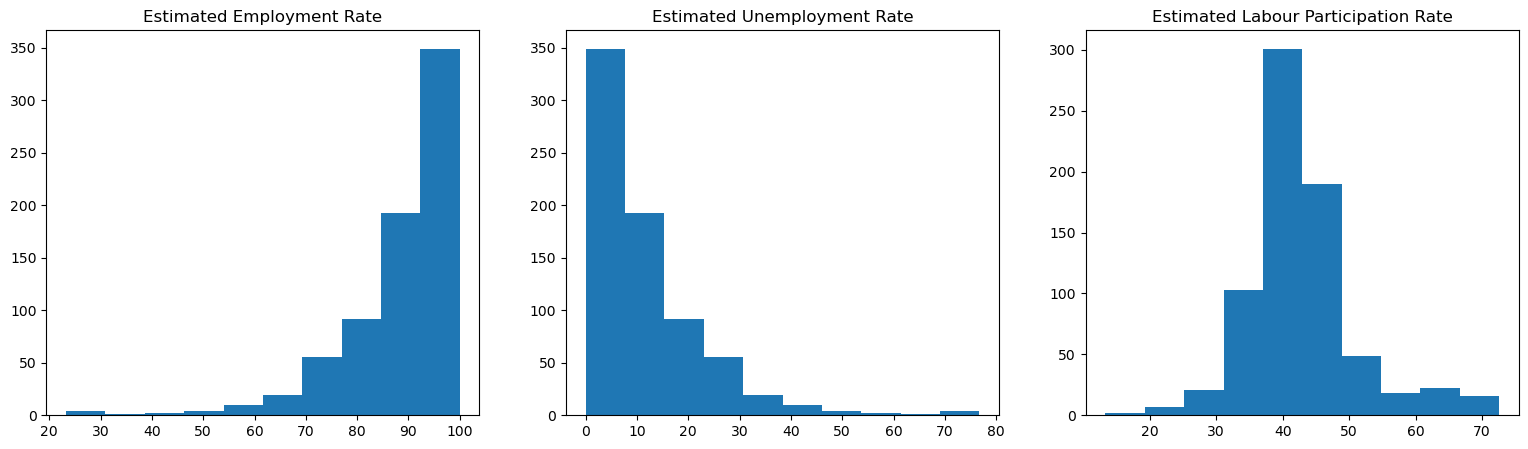

In [73]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(19,5))

ax[0].hist(df['Estimated Employment Rate (%)'])
ax[1].hist(df['Estimated Unemployment Rate (%)'])
ax[2].hist(df['Estimated Labour Participation Rate (%)'])

ax[0].set_title('Estimated Employment Rate')
ax[1].set_title('Estimated Unemployment Rate')
ax[2].set_title('Estimated Labour Participation Rate')

plt.show()

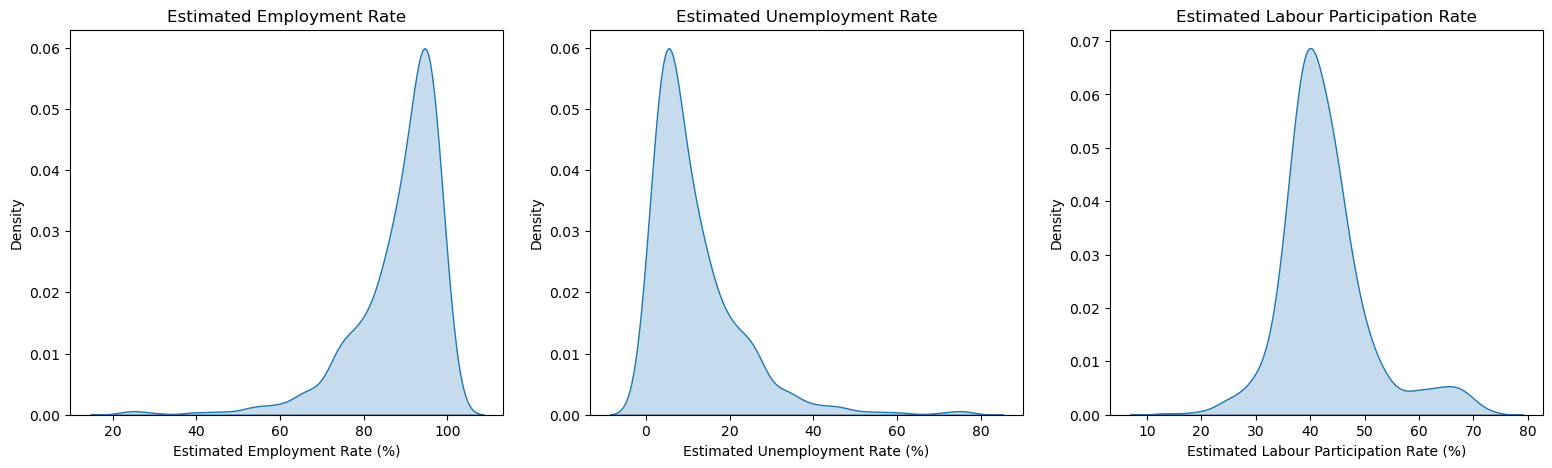

In [74]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(19,5))

sns.kdeplot(df['Estimated Employment Rate (%)'],ax=ax[0],fill=True)
sns.kdeplot(df['Estimated Unemployment Rate (%)'],ax=ax[1],fill=True)
sns.kdeplot(df['Estimated Labour Participation Rate (%)'],ax=ax[2],fill=True)

ax[0].set_title('Estimated Employment Rate')
ax[1].set_title('Estimated Unemployment Rate')
ax[2].set_title('Estimated Labour Participation Rate')

plt.show()

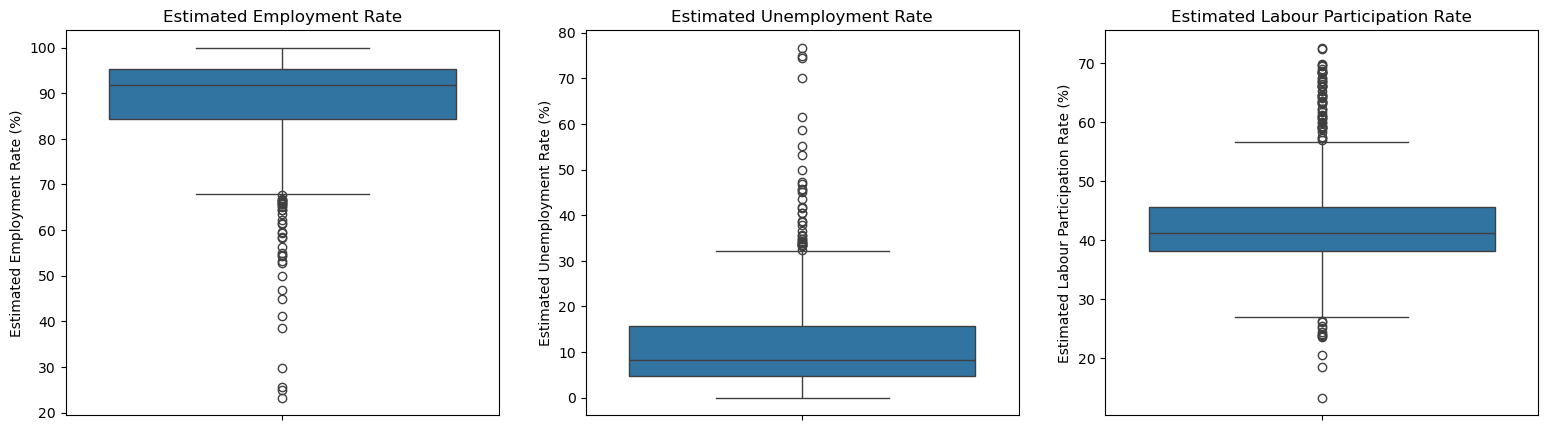

In [75]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(19,5))

sns.boxplot(df['Estimated Employment Rate (%)'],ax=ax[0])
sns.boxplot(df['Estimated Unemployment Rate (%)'],ax=ax[1])
sns.boxplot(df['Estimated Labour Participation Rate (%)'],ax=ax[2])

ax[0].set_title('Estimated Employment Rate')
ax[1].set_title('Estimated Unemployment Rate')
ax[2].set_title('Estimated Labour Participation Rate')

plt.show()

- Insights:
    - Estimated Labour Participation Rate (%) follows an approximately normal distribution, but it contains some outliers that deviate from the central trend.
    - Estimated Unemployment Rate (%) and Estimated Employment Rate (%) both exhibit skewed distributions with noticeable outliers, indicating irregularities in employment patterns across states and time periods.
    - These observations suggest that while labour participation is relatively stable, unemployment and employment rates are more volatile and influenced by extreme values, especially during events like the Covid-19 pandemic.

### Bivariate Analysis

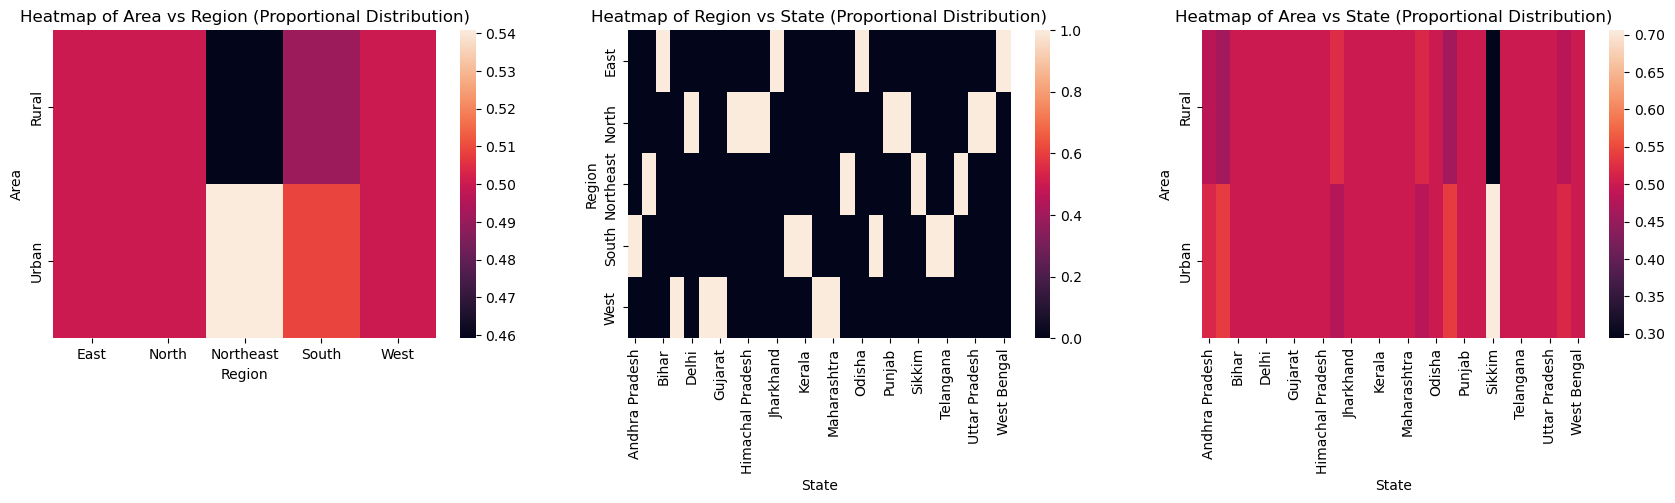

In [76]:
# Heatmap of  categarical columns
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(21,4))

sns.heatmap(pd.crosstab(df['Area'],df['Region'],normalize='columns'),ax=ax[0])
sns.heatmap(pd.crosstab(df['Region'],df['State'],normalize='columns'),ax=ax[1])
sns.heatmap(pd.crosstab(df['Area'],df['State'],normalize='columns'),ax=ax[2])
ax[1].set_ylabel('Region')
ax[1].set_xlabel('State')
ax[0].set_xlabel('Region')
ax[2].set_xlabel('State')
ax[0].set_title('Heatmap of Area vs Region (Proportional Distribution)')
ax[1].set_title('Heatmap of Region vs State (Proportional Distribution)')
ax[2].set_title('Heatmap of Area vs State (Proportional Distribution)')

plt.show()

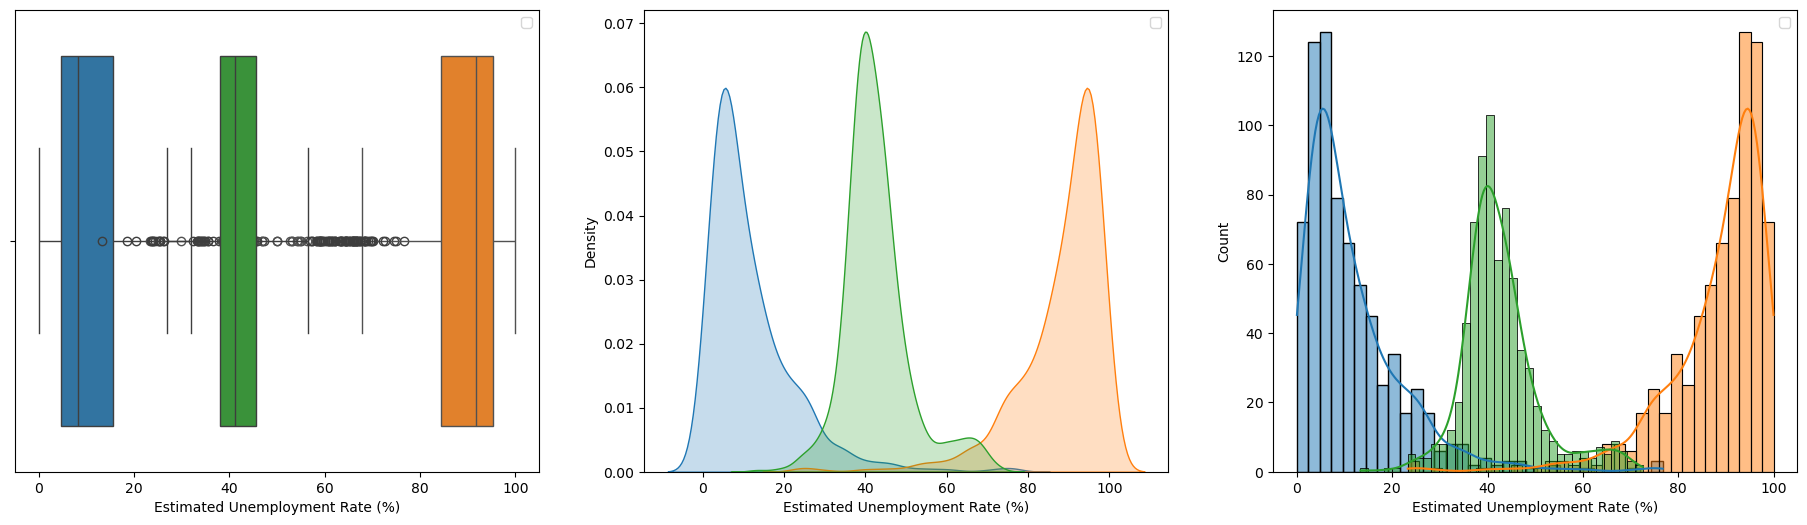

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(23,6))

sns.boxplot(df,x='Estimated Unemployment Rate (%)',ax=ax[0])
sns.boxplot(df,x='Estimated Employment Rate (%)',ax=ax[0])
sns.boxplot(df,x='Estimated Labour Participation Rate (%)',ax=ax[0])
ax[0].legend(loc='upper right')

sns.kdeplot(df,x='Estimated Unemployment Rate (%)',ax=ax[1],fill=True)
sns.kdeplot(df,x='Estimated Employment Rate (%)',ax=ax[1],fill=True)
sns.kdeplot(df,x='Estimated Labour Participation Rate (%)',ax=ax[1],fill=True)
ax[1].legend(loc='upper right')


sns.histplot(df,x='Estimated Unemployment Rate (%)',ax=ax[2],kde=True)
sns.histplot(df,x='Estimated Employment Rate (%)',ax=ax[2],kde=True)
sns.histplot(df,x='Estimated Labour Participation Rate (%)',ax=ax[2],kde=True)
ax[2].legend(loc='upper right')

plt.show()

#### Analysis by States 

- How states were affected in Year 2020 and 2019?

In [135]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Region', 'Year', 'Month', 'Estimated Employment Rate (%)',
       'Total Working Population'],
      dtype='object')

In [78]:
# Calculate average employment rate by state
avg_employment_rate = df.groupby('State')['Estimated Employed'].mean()

# Find state with highest employment rate
state_with_highest_employment = avg_employment_rate.idxmax()
high_employment_rate = avg_employment_rate.max()

# Find state with lowest employment rate
state_with_lowest_employment = avg_employment_rate.idxmin()
low_employment_rate = avg_employment_rate.min()

print(f"State with highest employment: {state_with_highest_employment}")
print(f"Highest employment rate: {high_employment_rate:.2f}%")

print(f"State with lowest employment: {state_with_lowest_employment}")
print(f"Lowest employment rate: {low_employment_rate:.2f}%")


State with highest employment: Uttar Pradesh
Highest employment rate: 28094832.18%
State with lowest employment: Sikkim
Lowest employment rate: 106880.71%


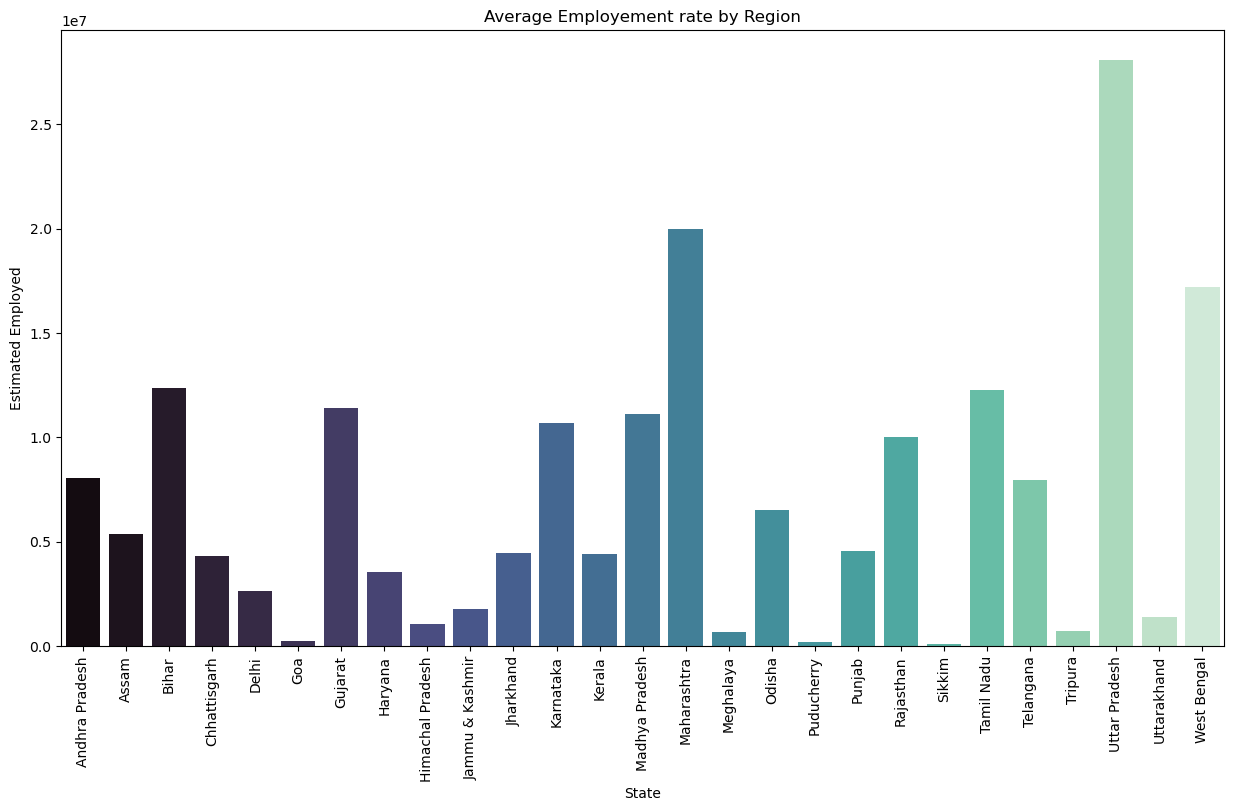

In [ ]:
# average employment rate by state
plt.figure(figsize=(15,8))
sns.barplot(x='State', y='Estimated Employed', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Average Employement rate by Region')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Group by state and find average unemployment rate
avg_unemp = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

print("Highest Average Unemployment Rate:", avg_unemp.head(1))
print("\nLowest Average Unemployment Rate:", avg_unemp.tail(1))

Highest Average Unemployment Rate: State
Tripura    28.350357
Name: Estimated Unemployment Rate (%), dtype: float64

Lowest Average Unemployment Rate: State
Meghalaya    4.798889
Name: Estimated Unemployment Rate (%), dtype: float64


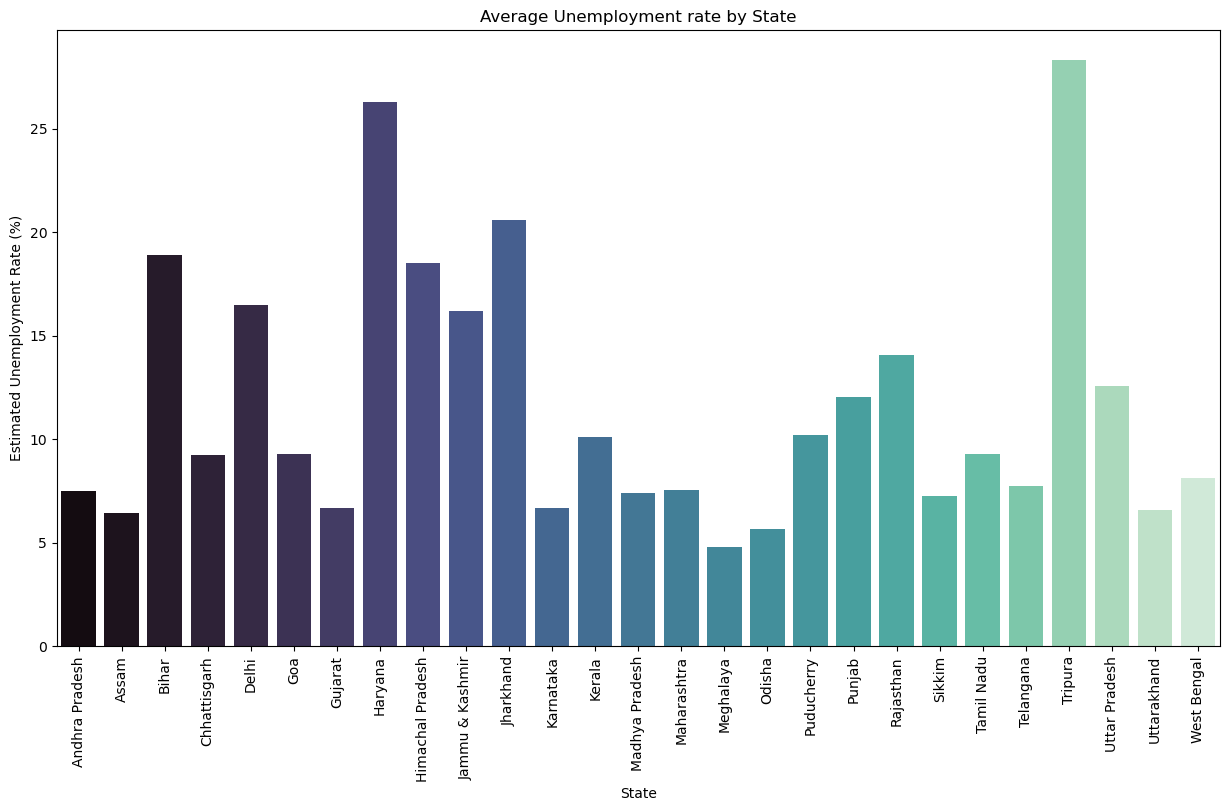

In [89]:
# unemployment rate in State
plt.figure(figsize=(15,8))
sns.barplot(x='State', y='Estimated Unemployment Rate (%)', data=df, ci=None, palette='mako')
plt.title('Average Unemployment rate by State')
plt.xticks(rotation=90)
plt.show()

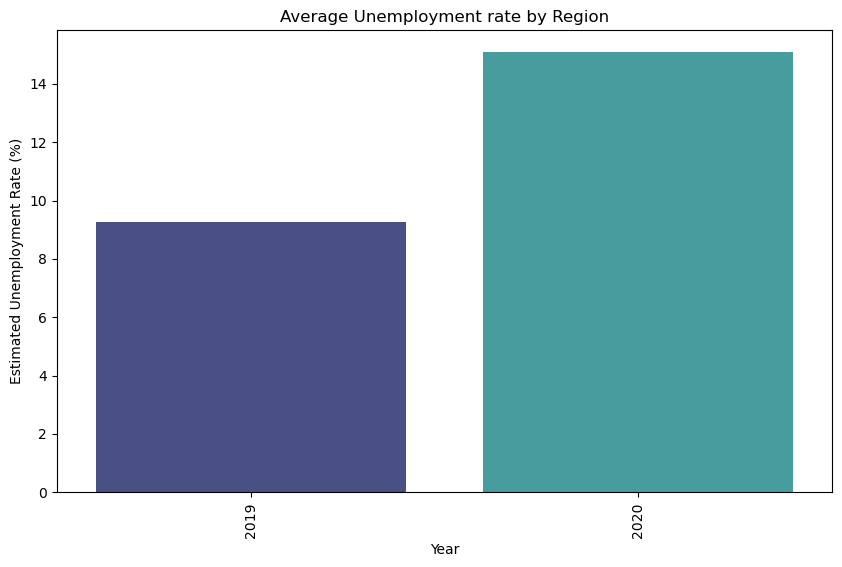

In [ ]:
# average unemployment per year
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Estimated Unemployment Rate (%)', data=df, ci=None, palette='mako')
plt.title('Average Unemployment rate by Region')
plt.xticks(rotation=90)
plt.show()

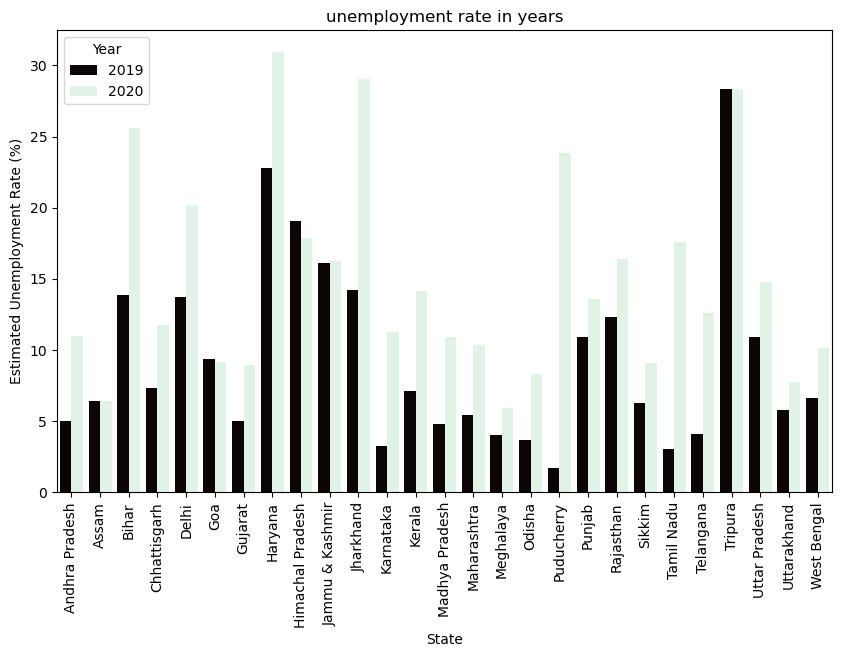

In [ ]:
# average unemployment in State per year
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Estimated Unemployment Rate (%)',hue="Year", data=df, ci = None, palette= 'mako')
plt.title('unemployment rate in years')
plt.xticks(rotation = 90)
plt.show()

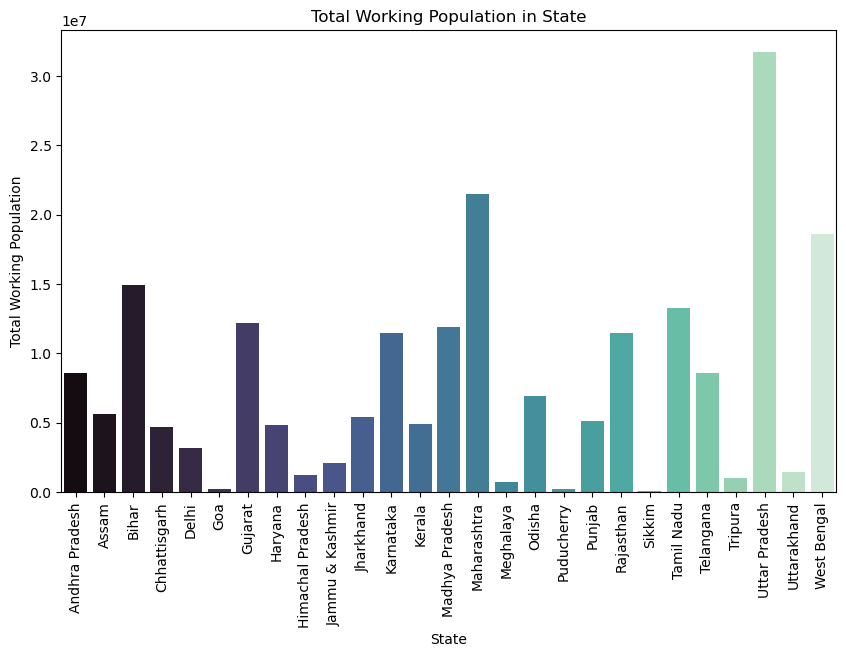

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Total Working Population', data=df, ci = None, palette= 'mako')
plt.title('Total Working Population in State')
plt.xticks(rotation = 90)
plt.show()

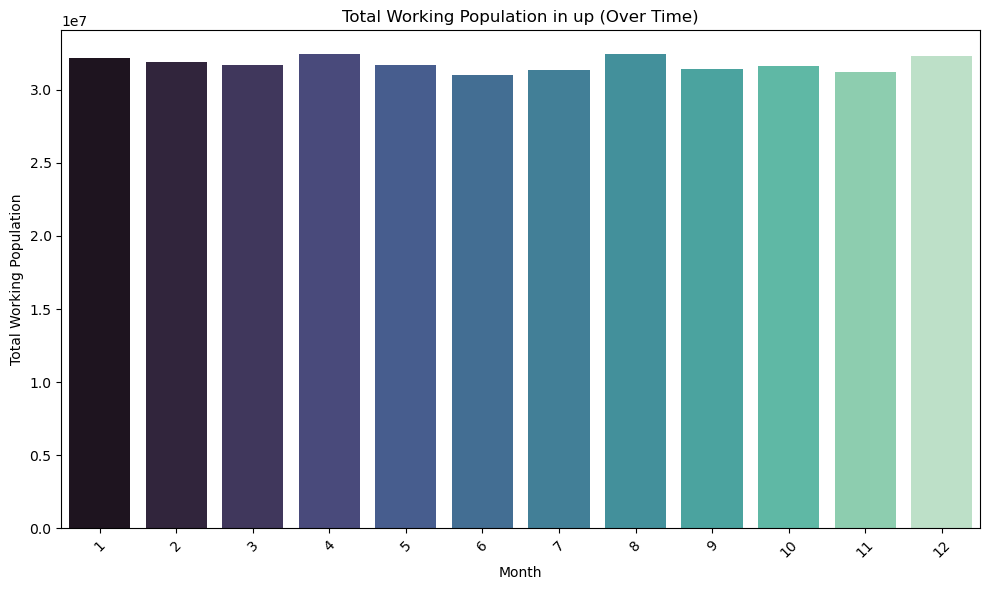

In [100]:
up_df = df[df['State'] == 'Uttar Pradesh']

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Working Population', data=up_df, ci=None, palette='mako')

plt.title('Total Working Population in up (Over Time)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


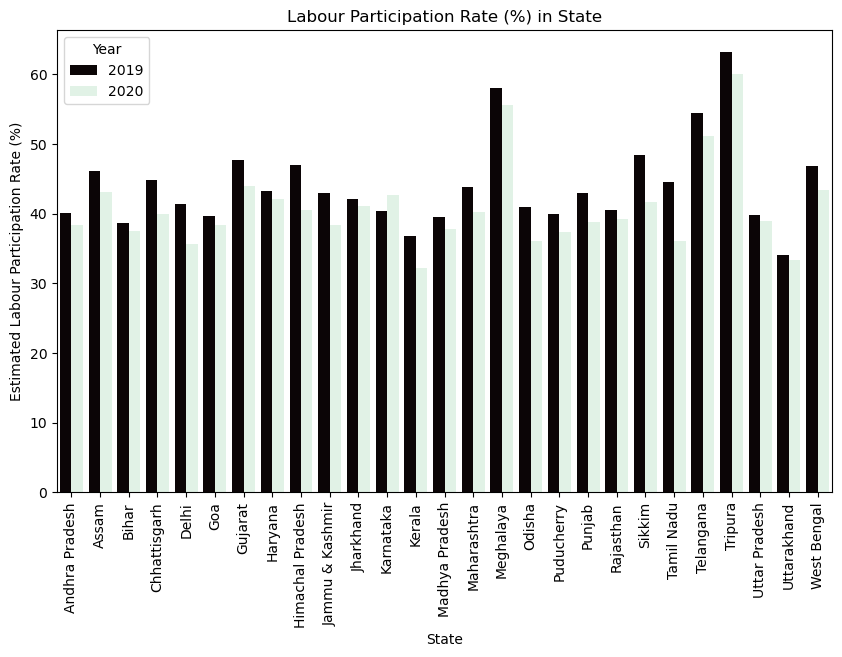

In [99]:
# 
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Estimated Labour Participation Rate (%)',hue='Year', data=df, ci = None, palette= 'mako')
plt.title('Labour Participation Rate (%) in State')
plt.xticks(rotation = 90)
plt.show()

#### Analysis by Area
- How urban and rural areas got affected in Total Time span?

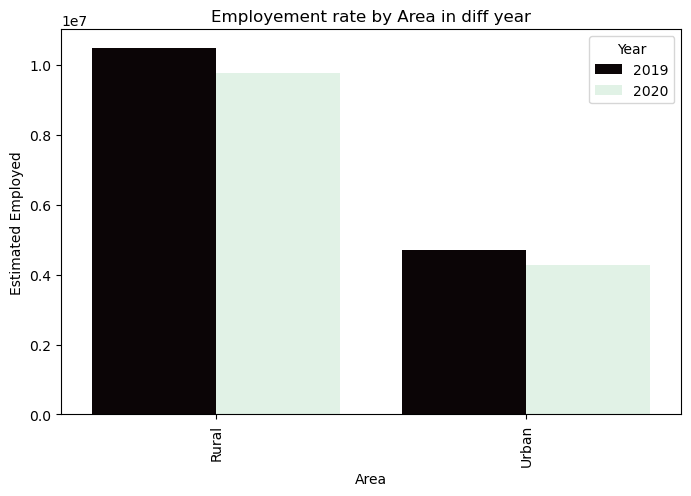

In [ ]:
# average employment rate in Area
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y='Estimated Employed', data=df,hue='Year', estimator='mean', ci=None, palette='mako')
plt.title('Employement rate by Area and Year')
plt.xticks(rotation=90)
plt.show()

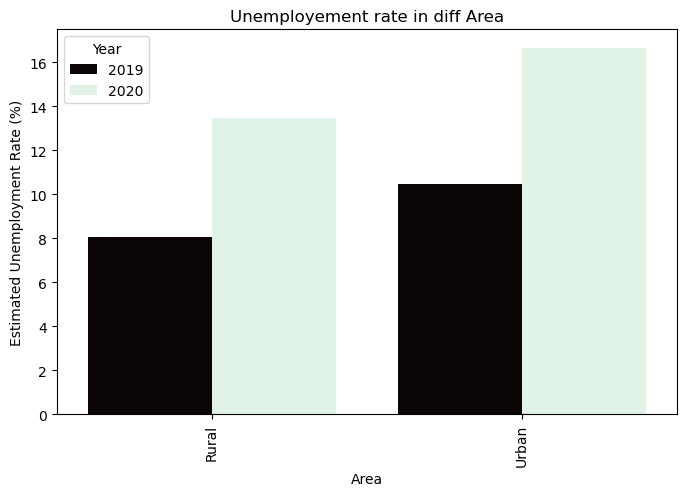

In [ ]:
# average unemployment rate by area in year
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Unemployement rate by Area and Year')
plt.xticks(rotation=90)
plt.show()

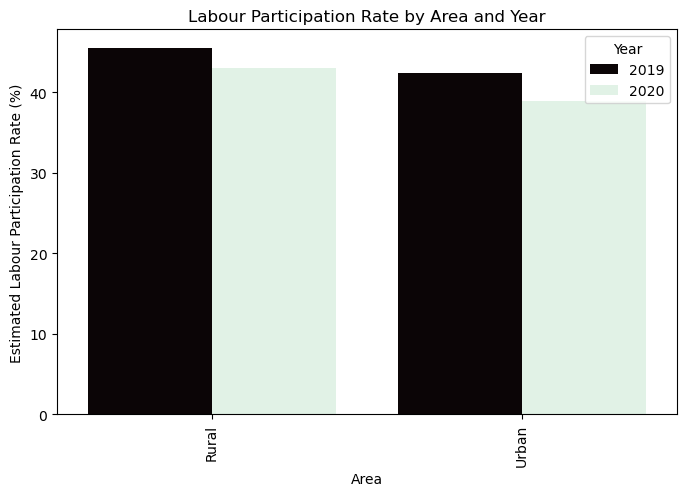

In [117]:
# Labour Participation Rate by area in year
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y='Estimated Labour Participation Rate (%)',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Labour Participation Rate by Area and Year')
plt.xticks(rotation=90)
plt.show()

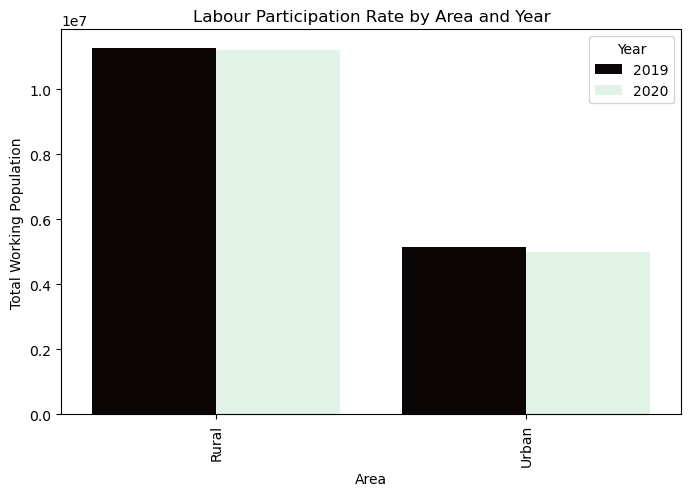

In [119]:
# Total Working Population by area & year
plt.figure(figsize=(8,5))
sns.barplot(x='Area', y='Total Working Population',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Labour Participation Rate by Area and Year')
plt.xticks(rotation=90)
plt.show()

#### Analysis by Region
- Which region is affected more in Years 2019 and 2020?

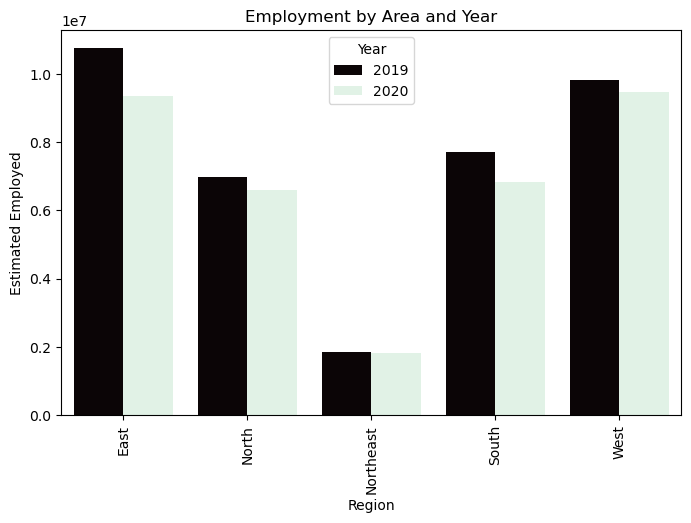

In [123]:
# Estimated Employed by Region & year
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Estimated Employed',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Employment by Area and Year')
plt.xticks(rotation=90)
plt.show()

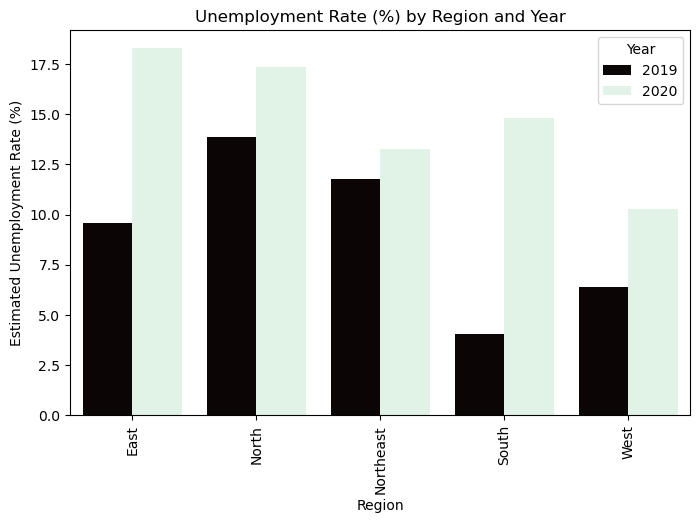

In [ ]:
# Estimated Unemployment Rate  by Region & year
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Unemployment Rate (%) by Region and Year')
plt.xticks(rotation=90)
plt.show()

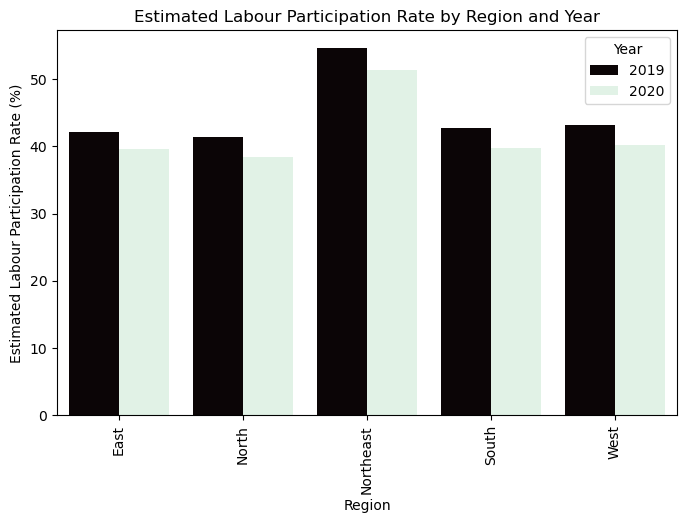

In [125]:
# Estimated Labour Participation Rate by Region & year
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)',hue='Year', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Estimated Labour Participation Rate by Region and Year')
plt.xticks(rotation=90)
plt.show()

#### Analysis by Date
- Which year has greatest impact on unemployent considereing 2020 as period of lockdown?

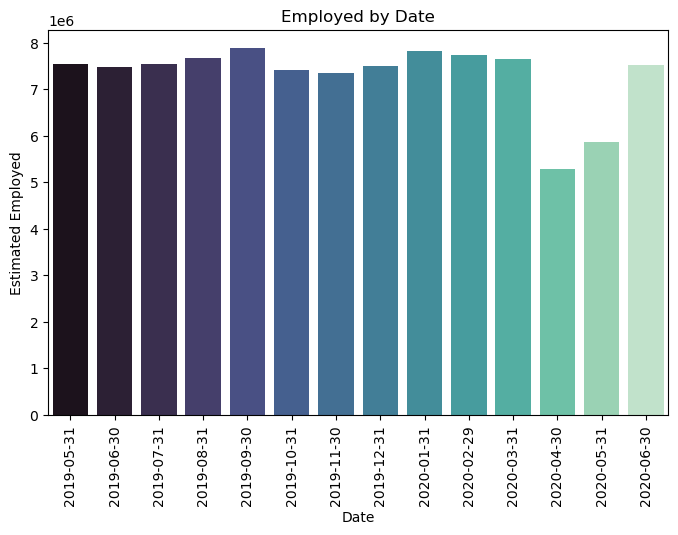

In [ ]:
# Employment Rate by Date
plt.figure(figsize=(8,5))
sns.barplot(x='Date', y='Estimated Employed', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Employed by Date')
plt.xticks(rotation=90)
plt.show()

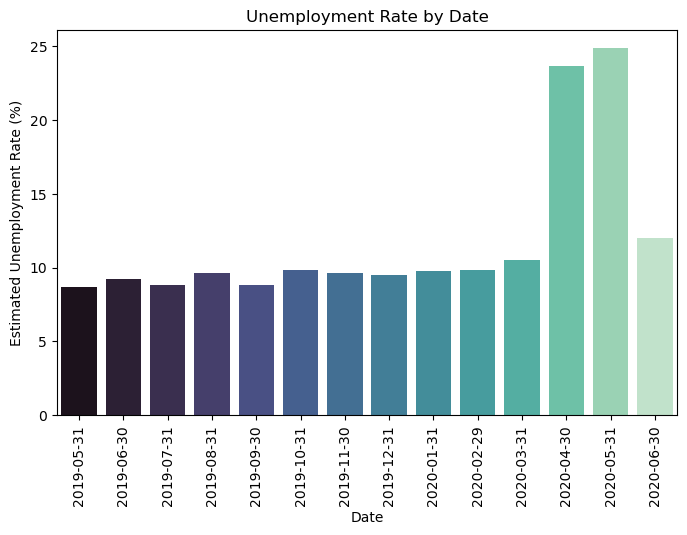

In [132]:
# Unemployment Rate by Date
plt.figure(figsize=(8,5))
sns.barplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Unemployment Rate by Date')
plt.xticks(rotation=90)
plt.show()

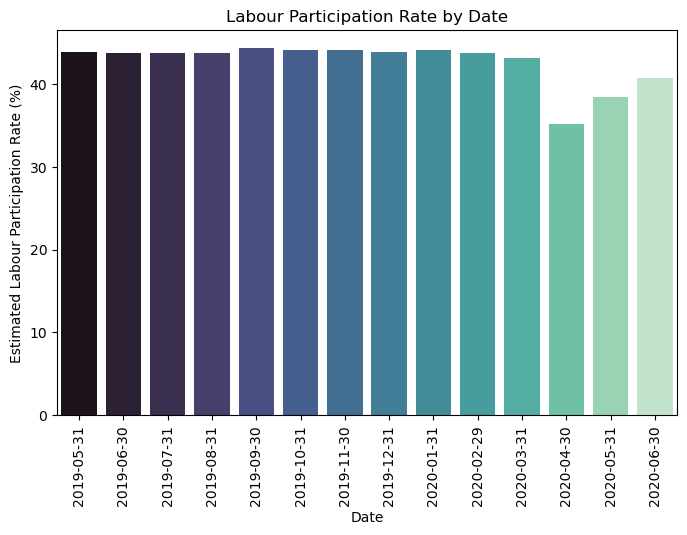

In [133]:
# Estimated Labour Participation Rate by Date
plt.figure(figsize=(8,5))
sns.barplot(x='Date', y='Estimated Labour Participation Rate (%)', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Labour Participation Rate by Date')
plt.xticks(rotation=90)
plt.show()

#### Others

In [136]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Region', 'Year', 'Month', 'Estimated Employment Rate (%)',
       'Total Working Population'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

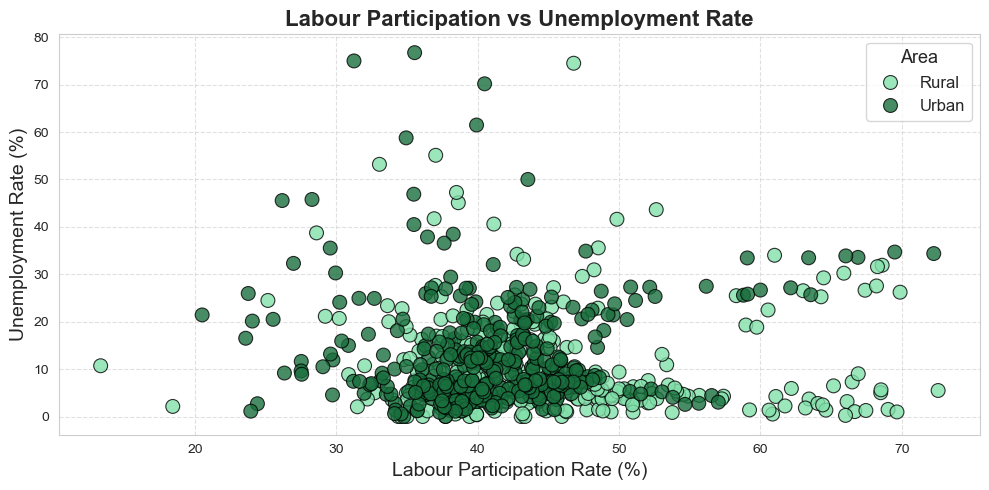

In [ ]:
# Labour Participation vs Unemployment Rate
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

sns.scatterplot(
    data=df,
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    hue='Area',
    palette={'Urban':'#196f3d', 'Rural':'#82e0aa'},
    s=100,
    alpha=0.8,
    edgecolor='black'
)

plt.title('Labour Participation vs Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Labour Participation Rate (%)', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.legend(title='Area', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusion & Insights
- This analysis of unemployment trends across regions during the Covid-19 period provides several important insights into India’s labour market dynamics:

#### 1. Labour Participation Rate (LPR):

- The LPR follows an approximately normal distribution, though the presence of outliers suggests periods of unusual labour market activity.
These outliers often correspond to months of sharp contraction or rebound, reflecting how workers either exited the labour force (due to discouragement or restrictions) or re-entered when opportunities opened.

#### 2. Unemployment Rate (UR):

- The unemployment rate distribution is positively skewed, meaning that although most values cluster at lower levels, extreme unemployment spikes were observed.
- The most significant increase occurred during mid-2019 to mid-2020, aligning with the strict lockdown period.

#### 3. Employment Rate (ER):

- Employment rate trends mirror unemployment but with opposite skewness, confirming job losses during the pandemic.
- The uneven shape of its distribution suggests that while some regions managed to restore employment quickly, others remained stuck in recovery for longer.
#### 4. Regional Variations:

- The East and South regions saw higher fluctuations in unemployment, while the West and North were relatively more stable.
- These differences highlight the regional heterogeneity in economic resilience, possibly tied to industrial structure, dependence on informal work, and state-level policy responses.

#### 5. Temporal Patterns (Heatmaps & Line Plots):

- The lockdown phase (May 2019 – June 2020) is marked by a pronounced spike in unemployment across almost all regions.
- Heatmaps clearly visualize how unemployment was not evenly distributed month-to-month, with certain months (e.g., April–May 2020) being extreme outliers.
- Line plots confirm the V-shaped trajectory of unemployment — a rapid rise during lockdown followed by a gradual decline as restrictions were lifted.

### Key Takeaways:
- Covid-19 triggered an extraordinary shock to India’s labour market, with both participation and employment suffering heavily.
- The impact was uneven — some regions bore disproportionate job losses, exposing structural weaknesses in their labour markets.
- Policymakers need to address vulnerable sectors and regions to ensure inclusive recovery.
- This analysis demonstrates the value of data-driven monitoring in capturing shocks and guiding timely interventions.